# Python 資料分析/機器學習常見Error

- 讀取檔案
- 資料視覺化
- 特徵處理:標準化
- 特徵處理:合併組別
- 特徵處理:label-encoding
- 切割訓練/驗證集
- 建立模型
- 模型預測

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

## 讀取檔案

In [2]:
# 確認當前路徑

import os
os.getcwd()

'/home/jovyan/tan/Python Script'

In [3]:
# 每個人可能都不同，請依照自己的路徑調整位置
# 我的檔案放在 '/home/jovyan/tan/Python Script/data/boston/' 資料夾下

os.chdir('/home/jovyan/tan/Python Script/data/boston/')

In [4]:
boston_house_train = pd.read_csv('train.csv')
boston_house_test = pd.read_csv('test.csv')

In [5]:
train_y = boston_house_train['SalePrice']

boston_house = pd.concat([boston_house_train.drop('SalePrice', axis = 1), boston_house_test],
                         sort = False).reset_index(drop = True)

In [6]:
boston_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [12]:
boston_house_train.groupby(['Street','LotShape']).apply(lambda x: x.SalePrice.mean())

Street  LotShape
Grvl    IR1         228950.000000
        IR2         110000.000000
        Reg         110548.250000
Pave    IR1         206054.360248
        IR2         243079.200000
        IR3         216036.500000
        Reg         164990.243214
dtype: float64

---

## 資料視覺化

In [7]:
boston_house_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


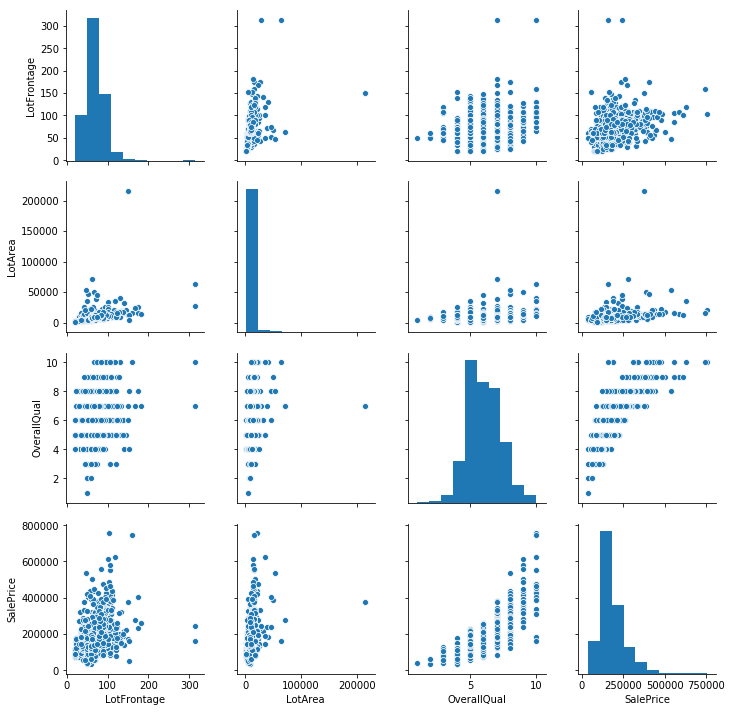

In [8]:
sns.pairplot(boston_house_train[['LotFrontage','LotArea','OverallQual','SalePrice']].dropna())

---

## 特徵處理 - 標準化

In [9]:
#注意，在這個步驟時我們已經用最粗糙的方式把遺漏值填補完成了
normalize_data = boston_house.fillna(0.0).copy()

for col in normalize_data.select_dtypes(include='number').columns:
    mms = MinMaxScaler()
    normalize_data[col] = mms.fit_transform(normalize_data[[col]])

In [10]:
normalize_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,0.235294,RL,0.207668,0.033420,Pave,0,Reg,Lvl,AllPub,...,0.0,0.0,0,0,0,0.0,0.090909,0.50,WD,Normal
1,0.000343,0.000000,RL,0.255591,0.038795,Pave,0,Reg,Lvl,AllPub,...,0.0,0.0,0,0,0,0.0,0.363636,0.25,WD,Normal
2,0.000685,0.235294,RL,0.217252,0.046507,Pave,0,IR1,Lvl,AllPub,...,0.0,0.0,0,0,0,0.0,0.727273,0.50,WD,Normal
3,0.001028,0.294118,RL,0.191693,0.038561,Pave,0,IR1,Lvl,AllPub,...,0.0,0.0,0,0,0,0.0,0.090909,0.00,WD,Abnorml
4,0.001371,0.235294,RL,0.268371,0.060576,Pave,0,IR1,Lvl,AllPub,...,0.0,0.0,0,0,0,0.0,1.000000,0.50,WD,Normal


---

## 特徵處理 - 合併組別

#### MSZoning

In [11]:
normalize_data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
0.0           4
Name: MSZoning, dtype: int64

In [12]:
# warning : slicing

normalize_data['MSZoning'][normalize_data['MSZoning']==0] = 'RL'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
normalize_data['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

#### LotShape

In [14]:
normalize_data['LotShape'].value_counts()

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [15]:
normalize_data.loc[normalize_data['LotShape']=='IR3','LotShape'] = 'IR2'

In [16]:
normalize_data['LotShape'].value_counts()

Reg    1859
IR1     968
IR2      92
Name: LotShape, dtype: int64

---

## 特徵處理 - Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encode_data = normalize_data.copy()

for col in label_encode_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    label_encode_data[col] = le.fit_transform(label_encode_data[col].astype('str'))

In [18]:
label_encode_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,0.235294,3,0.207668,0.033420,1,0,2,3,1,...,0.0,0.0,0,0,0,0.0,0.090909,0.50,9,4
1,0.000343,0.000000,3,0.255591,0.038795,1,0,2,3,1,...,0.0,0.0,0,0,0,0.0,0.363636,0.25,9,4
2,0.000685,0.235294,3,0.217252,0.046507,1,0,0,3,1,...,0.0,0.0,0,0,0,0.0,0.727273,0.50,9,4
3,0.001028,0.294118,3,0.191693,0.038561,1,0,0,3,1,...,0.0,0.0,0,0,0,0.0,0.090909,0.00,9,0
4,0.001371,0.235294,3,0.268371,0.060576,1,0,0,3,1,...,0.0,0.0,0,0,0,0.0,1.000000,0.50,9,4


---

## 切割訓練集&驗證集

In [19]:
train_len = len(boston_house_train)

train_x = label_encode_data.iloc[:train_len,:].drop('Id', axis = 1)
test_x = label_encode_data.iloc[train_len:,:].drop('Id', axis = 1)

---

## Build Model

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

t_x, v_x, t_y, v_y = train_test_split(train_x, train_y, test_size = 0.2, shuffle = True, random_state = 2019)

model = RandomForestRegressor(random_state = 2019)
model.fit(t_x, t_y)

print('Validation Score : {:.4f}'.format(model.score(v_x, v_y)))

pred_v = model.predict(v_x)
pred_test = model.predict(test_x)

Validation Score : 0.8645


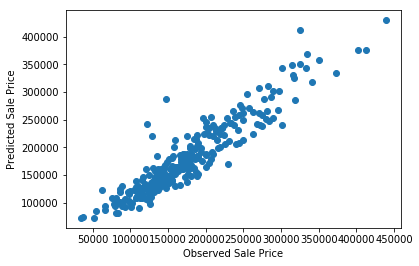

R2 score of validation set: 0.864
log-RMSE of validation set: 0.156


In [23]:
# SyntaxError - correct version

plt.scatter(v_y, pred_v)
plt.xlabel('Observed Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

print('R2 score of validation set: {:.3f}'.format(r2_score(y_true = v_y, y_pred = pred_v)))
print('log-RMSE of validation set: {:.3f}'.format((mean_squared_error(y_true = np.log(v_y), y_pred = np.log(pred_v)))**0.5))


### Make Submission

In [24]:
submission = pd.read_csv('sample_submission.csv')

submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [25]:
submission['SalePrice'] = pred_test

submission.head()

,Id,SalePrice
0,1461,132840.0
1,1462,151330.0
2,1463,179008.0
3,1464,186090.0
4,1465,215990.0


In [26]:
submission.to_csv('submission_gogo.csv', index = False)

# 恭喜，第一個提交完成~